In [6]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#  [n for n in glob.glob("1997-*.json") if os.path.isfile(n)]
yrs_to_process=[1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
                 2014,2015,2016,2017]

marvel_mntly_top_ten = []
dc_mntly_top_ten = []

publishers_attributes = ["Marvel_Top_Ten","DC_Top_Ten",'Others_Top_Ten','Marvel_Total_Sold',
                         'DC_Total_Sold','Total_Sold']

publishers_stats_df = pd.DataFrame(index=yrs_to_process ,columns=publishers_attributes)
publishers_stats_df = publishers_stats_df.fillna(value=0)

for index,row in publishers_stats_df.iterrows():
    marvel_mntly_top_ten = []
    dc_mntly_top_ten = []
    for comichron_json in glob.glob("./source-data/" + str(index) + "-*.json"):
        if os.path.isfile(comichron_json):
            print(f"Processing file {comichron_json}")
            monthly_df = pd.read_json(comichron_json)
#             publishers_stats_df = testpd[(testpd["rank"] >= 1) & (testpd["rank"] <= 10)]
            row['Total_Sold'] = row['Total_Sold'] + monthly_df["count"].sum()
            row['Marvel_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'Marvel']["count"].sum()
            row['DC_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'DC']["count"].sum()
            monthly_top_10 = monthly_df.sort_values(by = "count" ,ascending=False ).head(10)
            marvel_mntly_top_ten.append(len(monthly_top_10[monthly_top_10["publisher"] == 'Marvel']))
            dc_mntly_top_ten.append(len(monthly_top_10[monthly_top_10["publisher"] == 'DC']))
    row["Marvel_Top_Ten"] = np.median(marvel_mntly_top_ten)
    row["DC_Top_Ten"] = np.median(dc_mntly_top_ten)
    row["Others_Top_Ten"] = 10 - (row["Marvel_Top_Ten"] + row["DC_Top_Ten"])
            
# testpd = testpd.sort_values(by = "count" ,ascending=False ).head(10)
# testpd["publisher"].value_counts()

# marvel_mntly_top_ten
# monthly_df

Processing file ./source-data/1997-03.json
Processing file ./source-data/1997-02.json
Processing file ./source-data/1997-05.json
Processing file ./source-data/1997-09.json
Processing file ./source-data/1997-08.json
Processing file ./source-data/1997-12.json
Processing file ./source-data/1997-04.json
Processing file ./source-data/1997-11.json
Processing file ./source-data/1997-07.json
Processing file ./source-data/1997-06.json
Processing file ./source-data/1997-10.json
Processing file ./source-data/1997-01.json
Processing file ./source-data/1998-06.json
Processing file ./source-data/1998-10.json
Processing file ./source-data/1998-11.json
Processing file ./source-data/1998-07.json
Processing file ./source-data/1998-01.json
Processing file ./source-data/1998-02.json
Processing file ./source-data/1998-03.json
Processing file ./source-data/1998-12.json
Processing file ./source-data/1998-04.json
Processing file ./source-data/1998-08.json
Processing file ./source-data/1998-09.json
Processing 

Processing file ./source-data/2013-01.json
Processing file ./source-data/2014-10.json
Processing file ./source-data/2014-06.json
Processing file ./source-data/2014-07.json
Processing file ./source-data/2014-11.json
Processing file ./source-data/2014-01.json
Processing file ./source-data/2014-02.json
Processing file ./source-data/2014-03.json
Processing file ./source-data/2014-08.json
Processing file ./source-data/2014-04.json
Processing file ./source-data/2014-12.json
Processing file ./source-data/2014-05.json
Processing file ./source-data/2014-09.json
Processing file ./source-data/2015-07.json
Processing file ./source-data/2015-11.json
Processing file ./source-data/2015-10.json
Processing file ./source-data/2015-06.json
Processing file ./source-data/2015-01.json
Processing file ./source-data/2015-03.json
Processing file ./source-data/2015-02.json
Processing file ./source-data/2015-09.json
Processing file ./source-data/2015-05.json
Processing file ./source-data/2015-04.json
Processing 

In [9]:
publishers_stats_df

,Marvel_Top_Ten,DC_Top_Ten,Others_Top_Ten,Marvel_Total_Sold,DC_Total_Sold,Total_Sold
1997,8,1,1,34985441,28097651,96154708
1998,7,1,2,28811621,24753072,81370613
1999,7,1,2,25793551,25802128,73533305
2000,7,1,2,22457597,23905108,66331411
2001,8,2,0,26143410,21102509,64312599
2002,8,1,1,31473401,20685102,70837161
2003,8,1,1,31323386,22750790,71139392
2004,7,2,1,35234972,25379713,72733899
2005,5,5,0,34821847,28910833,74008729
2006,5,5,0,36328753,32188030,78872675


In [10]:
publishers_stats_df.index.names = ['Year']
publishers_stats_df = publishers_stats_df.reset_index()
# publishers_stats_df = publishers_stats_df.reset_index()
# publishers_stats_df.rename(columns={"index":"Year"})


In [11]:
publishers_stats_df

,Year,Marvel_Top_Ten,DC_Top_Ten,Others_Top_Ten,Marvel_Total_Sold,DC_Total_Sold,Total_Sold
0,1997,8,1,1,34985441,28097651,96154708
1,1998,7,1,2,28811621,24753072,81370613
2,1999,7,1,2,25793551,25802128,73533305
3,2000,7,1,2,22457597,23905108,66331411
4,2001,8,2,0,26143410,21102509,64312599
5,2002,8,1,1,31473401,20685102,70837161
6,2003,8,1,1,31323386,22750790,71139392
7,2004,7,2,1,35234972,25379713,72733899
8,2005,5,5,0,34821847,28910833,74008729
9,2006,5,5,0,36328753,32188030,78872675


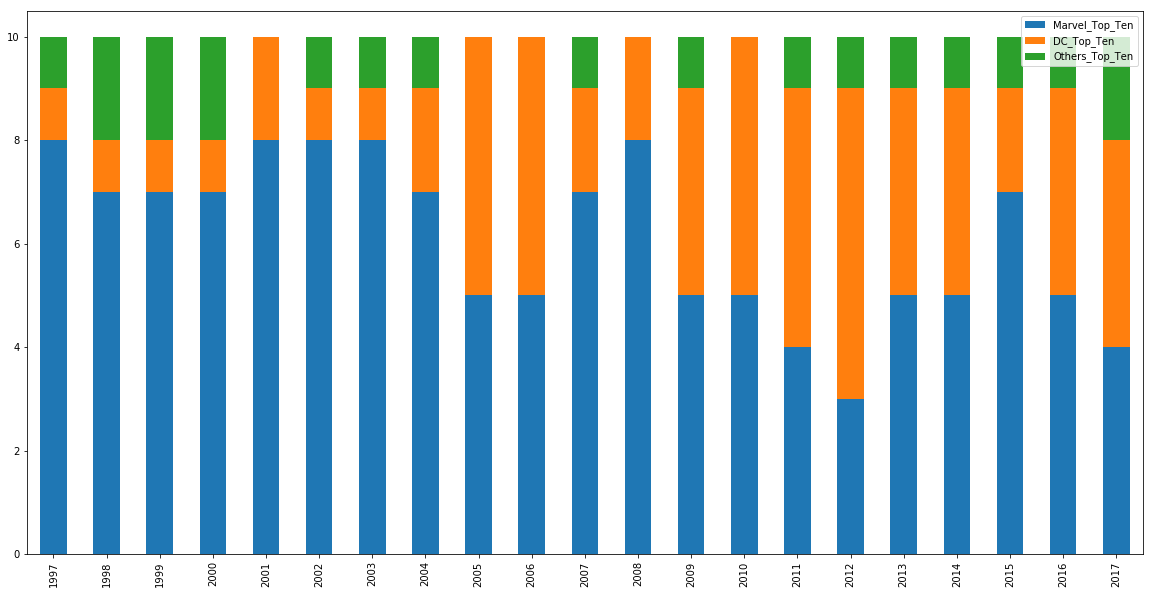

In [12]:

#publishers_stats_df.plot(kind="scatter",x="Year",y="Marvel_Top_Ten",figsize=(20, 10))
# ax = publishers_stats_df[["Marvel_Top_Ten","DC_Top_Ten"]].plot(kind='bar',figsize=(20, 10))
ax = publishers_stats_df[["Marvel_Top_Ten","DC_Top_Ten","Others_Top_Ten"]].plot(kind='bar',figsize=(20, 10),stacked = True)
ax.set_xticklabels(yrs_to_process)
# plt.plot(kind="line",x=publishers_stats_df["Year"],y= publishers_stats_df["Marvel_Top_Ten"])
plt.show()

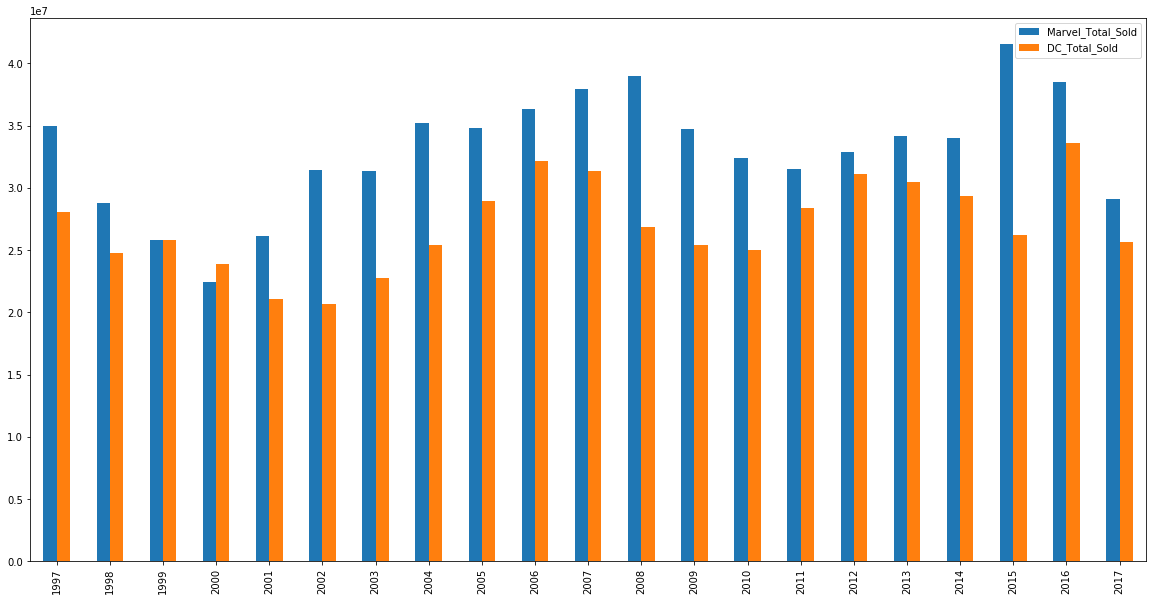

In [13]:
# ax = publishers_stats_df[["Marvel_Total_Sold","DC_Total_Sold","Total_Sold"]].plot(kind='bar',figsize=(20, 10),stacked = True)
# plt.plot(kind="line",x=publishers_stats_df["Year"],y= publishers_stats_df["Marvel_Top_Ten"])
ax = publishers_stats_df[["Marvel_Total_Sold","DC_Total_Sold"]].plot(kind='bar',figsize=(20, 10))
ax.set_xticklabels(yrs_to_process)
plt.show()